In [1]:
#pip install lightgbm
import lightgbm as lgb
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from Energy_Models.RBFN import RBFN_Model

In [2]:
df = pd.read_csv("C:\\Users\\delll\\Downloads\\energydata_complete.csv",index_col="date")

In [3]:
scaler = MinMaxScaler().fit(df)
df    = pd.DataFrame(scaler.transform(df))

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [4]:
X_train ,X_test ,Y_train ,Y_test=train_test_split(X ,y ,test_size=0.30,random_state=35)
X_train = np.array(X_train)
X_test  = np.array(X_test)

In [5]:
X_train.shape ,X_test.shape ,Y_train.shape ,Y_test.shape


((13814, 27), (5921, 27), (13814,), (5921,))

In [6]:
n_steps, n_features = 1, X_train.shape[1]
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model = RBFN_Model(n_steps,n_features).getModel()

In [7]:
X_train=X_train.reshape((X_train.shape[0],n_steps,X_train.shape[1]))
X_test=X_test.reshape((X_test.shape[0],n_steps,X_test.shape[1]))

In [8]:
model.compile(optimizer='adam', loss ='mse')
history = model.fit(X_train,Y_train, batch_size=512,epochs=200,verbose=1,validation_split=0.3,callbacks=callback)

Epoch 1/200
19/19 [==============================] - 5s 113ms/step - loss: 0.1820 - val_loss: 0.1813
Epoch 2/200
19/19 [==============================] - 1s 73ms/step - loss: 0.1781 - val_loss: 0.1800
Epoch 3/200
19/19 [==============================] - 1s 72ms/step - loss: 0.1742 - val_loss: 0.1799
Epoch 4/200
19/19 [==============================] - 1s 74ms/step - loss: 0.1704 - val_loss: 0.1795
Epoch 5/200
19/19 [==============================] - 1s 75ms/step - loss: 0.1667 - val_loss: 0.1782
Epoch 6/200
19/19 [==============================] - 1s 72ms/step - loss: 0.1631 - val_loss: 0.1757
Epoch 7/200
19/19 [==============================] - 1s 75ms/step - loss: 0.1595 - val_loss: 0.1719
Epoch 8/200
19/19 [==============================] - 1s 72ms/step - loss: 0.1560 - val_loss: 0.1668
Epoch 9/200
19/19 [==============================] - 1s 72ms/step - loss: 0.1525 - val_loss: 0.1612
Epoch 10/200
19/19 [==============================] - 1s 74ms/step - loss: 0.1492 - val_loss: 0.155

19/19 [==============================] - 1s 69ms/step - loss: 0.0338 - val_loss: 0.0339
Epoch 83/200
19/19 [==============================] - 1s 70ms/step - loss: 0.0332 - val_loss: 0.0333
Epoch 84/200
19/19 [==============================] - 1s 69ms/step - loss: 0.0327 - val_loss: 0.0328
Epoch 85/200
19/19 [==============================] - 1s 69ms/step - loss: 0.0321 - val_loss: 0.0322
Epoch 86/200
19/19 [==============================] - 1s 68ms/step - loss: 0.0316 - val_loss: 0.0317
Epoch 87/200
19/19 [==============================] - 1s 78ms/step - loss: 0.0311 - val_loss: 0.0312
Epoch 88/200
19/19 [==============================] - 1s 71ms/step - loss: 0.0306 - val_loss: 0.0307
Epoch 89/200
19/19 [==============================] - 1s 71ms/step - loss: 0.0301 - val_loss: 0.0303
Epoch 90/200
19/19 [==============================] - 1s 70ms/step - loss: 0.0297 - val_loss: 0.0298
Epoch 91/200
19/19 [==============================] - 1s 70ms/step - loss: 0.0292 - val_loss: 0.0293
Epo

19/19 [==============================] - 1s 70ms/step - loss: 0.0133 - val_loss: 0.0136
Epoch 163/200
19/19 [==============================] - 1s 69ms/step - loss: 0.0132 - val_loss: 0.0135
Epoch 164/200
19/19 [==============================] - 1s 70ms/step - loss: 0.0131 - val_loss: 0.0134
Epoch 165/200
19/19 [==============================] - 1s 74ms/step - loss: 0.0130 - val_loss: 0.0134
Epoch 166/200
19/19 [==============================] - 2s 89ms/step - loss: 0.0129 - val_loss: 0.0133
Epoch 167/200
19/19 [==============================] - 1s 76ms/step - loss: 0.0128 - val_loss: 0.0132
Epoch 168/200
19/19 [==============================] - 1s 75ms/step - loss: 0.0128 - val_loss: 0.0131
Epoch 169/200
19/19 [==============================] - 1s 73ms/step - loss: 0.0127 - val_loss: 0.0130
Epoch 170/200
19/19 [==============================] - 1s 73ms/step - loss: 0.0126 - val_loss: 0.0130
Epoch 171/200
19/19 [==============================] - 1s 75ms/step - loss: 0.0125 - val_loss: 0

In [9]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

186/186 [==============================] - 1s 4ms/step


In [10]:
model.evaluate(X_train,Y_train)

432/432 [==============================] - 2s 4ms/step - loss: 0.0110


0.010964165441691875

In [11]:
model.evaluate(X_test,Y_test)

186/186 [==============================] - 1s 4ms/step - loss: 0.0108


0.0107523612678051

In [12]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

def root_mean_squared_error(y_true, y_pred):    
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [13]:
print('Train RMSE value for  RBFN Model  : %.3f ' % root_mean_squared_error(Y_train, Y_pred_train))
print('Train MSE value for  RBFN Model  : %.3f ' % mean_squared_error(Y_train, Y_pred_train))
print('Train R2 value for  RBFN Model  : %.3f ' % r2_score(Y_train, Y_pred_train))
print('Train MAPE value for  RBFN Model  : %.3f ' % mean_absolute_percentage_error(Y_train, Y_pred_train))
print('Train RMLSE value for  RBFN Model  : %.3f ' % mean_squared_log_error(Y_train, Y_pred_train))
print('Train MAE value for  RBFN Model  : %.3f ' % mean_absolute_error(Y_train, Y_pred_train))
print('---------------------------------------------')
print('Test RMSE value for  RBFN Model  : %.3f ' % root_mean_squared_error(Y_test, Y_pred_test))
print('Test MSE value for  RBFN Model  : %.3f ' % mean_squared_error(Y_test, Y_pred_test))
print('Test R2 value for  RBFN Model  : %.3f ' % r2_score(Y_test, Y_pred_test))
print('Test MAPE value for  RBFN Model  : %.3f ' % mean_absolute_percentage_error(Y_test, Y_pred_test))
print('Test RMLSE value for  RBFN Model  : %.3f ' % mean_squared_log_error(Y_test, Y_pred_test))
print('Test MAE value for  RBFN Model  : %.3f ' % mean_absolute_error(Y_test, Y_pred_test))

Train RMSE value for  RBFN Model  : 0.105 
Train MSE value for  RBFN Model  : 0.011 
Train R2 value for  RBFN Model  : -0.186 
Train MAPE value for  RBFN Model  : 281685548354.507 
Train RMLSE value for  RBFN Model  : 0.008 
Train MAE value for  RBFN Model  : 0.084 
---------------------------------------------
Test RMSE value for  RBFN Model  : 0.104 
Test MSE value for  RBFN Model  : 0.011 
Test R2 value for  RBFN Model  : -0.192 
Test MAPE value for  RBFN Model  : 187767711293.075 
Test RMLSE value for  RBFN Model  : 0.008 
Test MAE value for  RBFN Model  : 0.084 


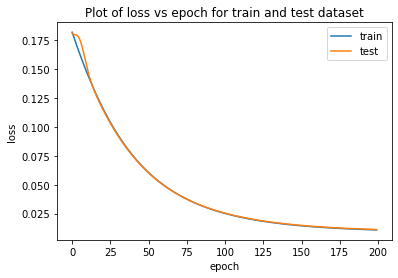

In [14]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()